In [ ]:
%pip install -q matplotlib 
%pip install -q seaborn
%pip install -q pandas
%pip install -q numpy

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np
import os 

In [25]:
ior_results_dirs = [
   # 'ior_results_n-1_seg-1_20250904',
    'ior_results_n-1_seg-6_20250904',
    'ior_results_n-2_seg-1_20250904'
]

# for each csv in each dir
# take the highest bandwidth row
df = pd.DataFrame()
for dir in ior_results_dirs:
    for file_name in os.listdir(dir):
        if file_name.endswith('.csv'): 
            file = os.path.join(dir, file_name)
            tmp = pd.read_csv(file)
            tmp = (tmp.iloc[tmp.idxmax(numeric_only=True)['bw(MiB/s)']].to_frame().T)
            tmp['fromCSV'] = file_name
            df = pd.concat([df,tmp], ignore_index=True)

df.to_csv('ior_results.csv')
# print(df.to_string())
frequency_table = pd.crosstab(df['fromCSV'], 'Count')
print(frequency_table[frequency_table['Count']>1])

Empty DataFrame
Columns: [Count]
Index: []


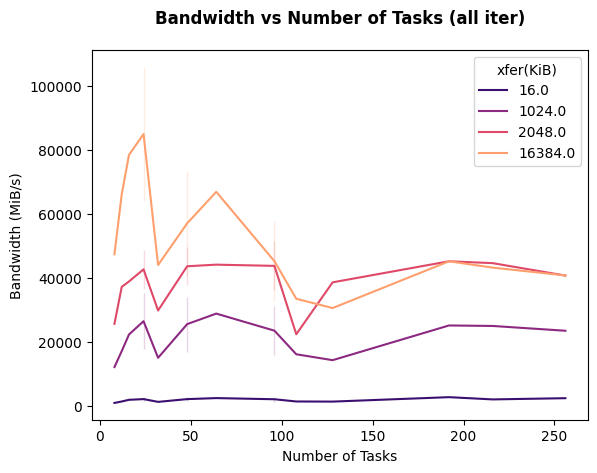

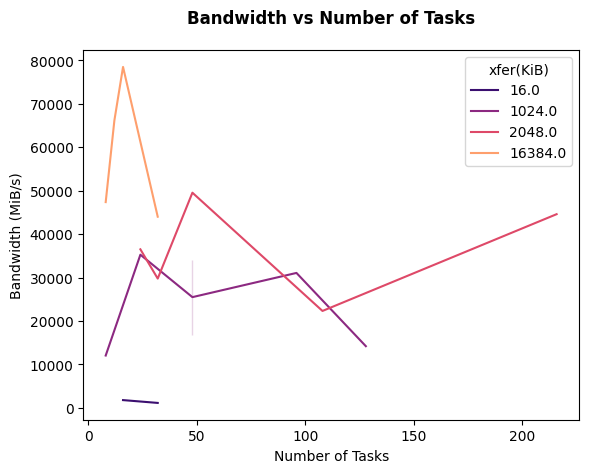

   access   bw(MiB/s)        IOPS Latency block(KiB) xfer(KiB) open(s)  \
6   write  36504.6545  18368.3068   0.005   131072.0    2048.0  0.0125   
47  write  35266.2213  36545.2412  0.0004   131072.0    1024.0  0.0059   

   wr/rd(s) close(s) total(s) numTasks iter                     fromCSV  
6    0.5017   0.1851   0.5049       24    4  write_n-1_ppn-24_tx-2M.csv  
47   0.0841   0.0287   0.0871       24    4  write_n-2_ppn-12_tx-1M.csv  


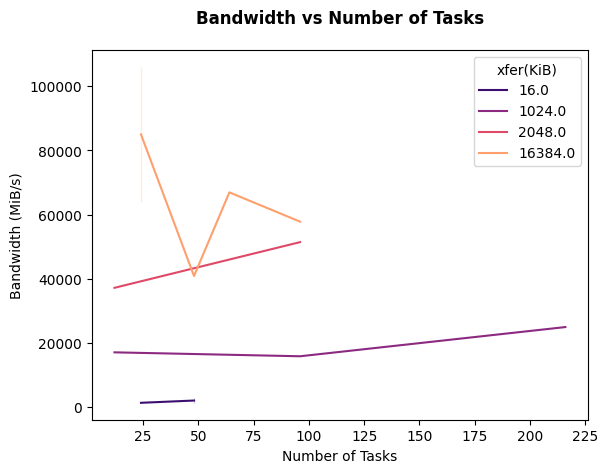

   access   bw(MiB/s)        IOPS Latency block(KiB) xfer(KiB) open(s)  \
6   write  36504.6545  18368.3068   0.005   131072.0    2048.0  0.0125   
47  write  35266.2213  36545.2412  0.0004   131072.0    1024.0  0.0059   

   wr/rd(s) close(s) total(s) numTasks iter                     fromCSV  
6    0.5017   0.1851   0.5049       24    4  write_n-1_ppn-24_tx-2M.csv  
47   0.0841   0.0287   0.0871       24    4  write_n-2_ppn-12_tx-1M.csv  


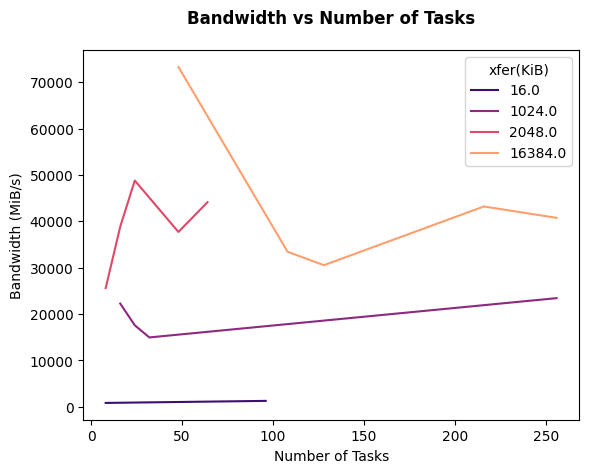

   access   bw(MiB/s)        IOPS Latency block(KiB) xfer(KiB) open(s)  \
6   write  36504.6545  18368.3068   0.005   131072.0    2048.0  0.0125   
47  write  35266.2213  36545.2412  0.0004   131072.0    1024.0  0.0059   

   wr/rd(s) close(s) total(s) numTasks iter                     fromCSV  
6    0.5017   0.1851   0.5049       24    4  write_n-1_ppn-24_tx-2M.csv  
47   0.0841   0.0287   0.0871       24    4  write_n-2_ppn-12_tx-1M.csv  


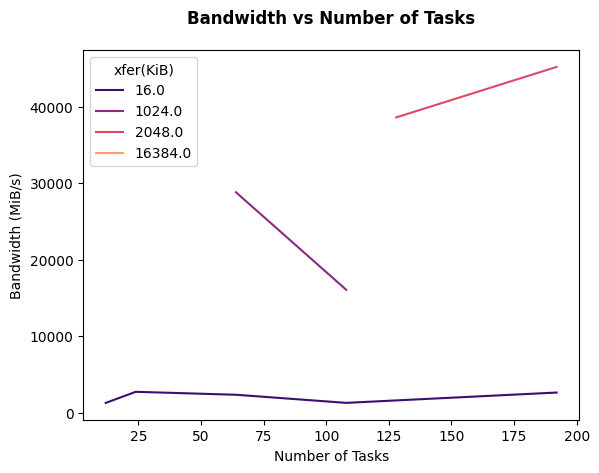

   access   bw(MiB/s)        IOPS Latency block(KiB) xfer(KiB) open(s)  \
6   write  36504.6545  18368.3068   0.005   131072.0    2048.0  0.0125   
47  write  35266.2213  36545.2412  0.0004   131072.0    1024.0  0.0059   

   wr/rd(s) close(s) total(s) numTasks iter                     fromCSV  
6    0.5017   0.1851   0.5049       24    4  write_n-1_ppn-24_tx-2M.csv  
47   0.0841   0.0287   0.0871       24    4  write_n-2_ppn-12_tx-1M.csv  


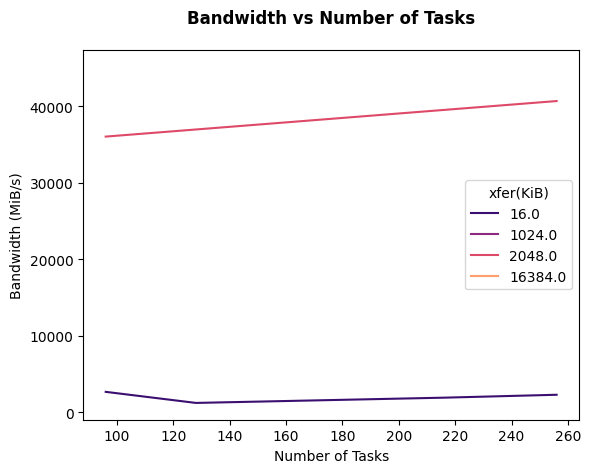

   access   bw(MiB/s)        IOPS Latency block(KiB) xfer(KiB) open(s)  \
6   write  36504.6545  18368.3068   0.005   131072.0    2048.0  0.0125   
47  write  35266.2213  36545.2412  0.0004   131072.0    1024.0  0.0059   

   wr/rd(s) close(s) total(s) numTasks iter                     fromCSV  
6    0.5017   0.1851   0.5049       24    4  write_n-1_ppn-24_tx-2M.csv  
47   0.0841   0.0287   0.0871       24    4  write_n-2_ppn-12_tx-1M.csv  


<Figure size 640x480 with 0 Axes>

In [ ]:
palette = sns.color_palette("magma", len(df["xfer(KiB)"].unique()))
ax = sns.lineplot(
                data=df,
                x="numTasks",
                y="bw(MiB/s)",
                hue="xfer(KiB)",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                palette=palette
            )
# ax.set_xticks(subdf["job options.numjobs"].unique())
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("Bandwidth (MiB/s)")
ax.set_title("Bandwidth vs Number of Tasks (all iter)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 
for i in df["iter"].unique():
    subdf = df[df['iter']==i]
    ax = sns.lineplot(
                    data=subdf,
                    x="numTasks",
                    y="bw(MiB/s)",
                    hue="xfer(KiB)",
                    # style="rand_seq_type", dashes=dashes,
                    # marker='o',
                    # hue_order=hue_order,
                    # order=bs_order,
                    palette=palette
                )
    # ax.set_xticks(subdf["job options.numjobs"].unique())
    ax.set_xlabel("Number of Tasks")
    ax.set_ylabel("Bandwidth (MiB/s)")
    ax.set_title("Bandwidth vs Number of Tasks", weight="bold", x=0.5, y=1.05)
    plt.show()
    plt.clf()
    print(df[((df['numTasks']==24) & (df['iter']==4))])

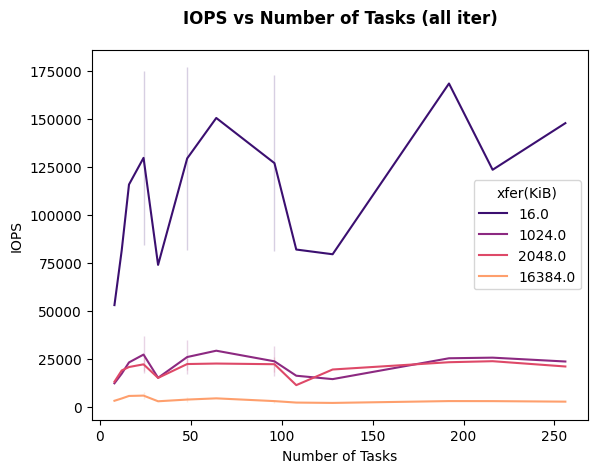

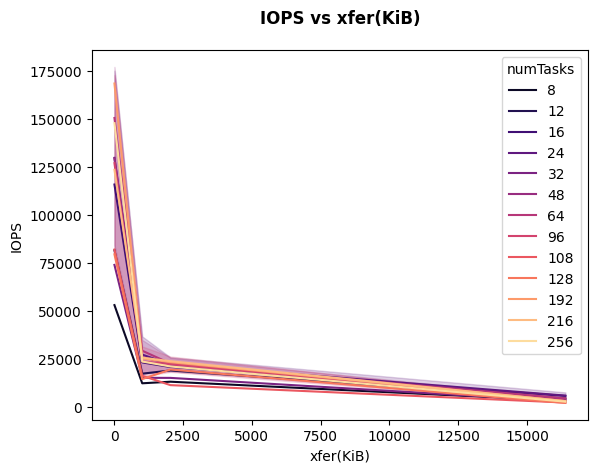

<Figure size 640x480 with 0 Axes>

In [36]:
palette = sns.color_palette("magma", len(df["xfer(KiB)"].unique()))
ax = sns.lineplot(
                data=df,
                x="numTasks",
                y="IOPS",
                hue="xfer(KiB)",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                palette=palette
            )
# ax.set_xticks(subdf["job options.numjobs"].unique())
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("IOPS")
ax.set_title("IOPS vs Number of Tasks (all iter)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 
palette = sns.color_palette("magma", len(df["numTasks"].unique()))
ax = sns.lineplot(
                data=df,
                x="xfer(KiB)",
                y="IOPS",
                hue="numTasks",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                palette=palette
            )
# ax.set_xticks(subdf["job options.numjobs"].unique())
ax.set_xlabel("xfer(KiB)")
ax.set_ylabel("IOPS")
ax.set_title("IOPS vs xfer(KiB)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 

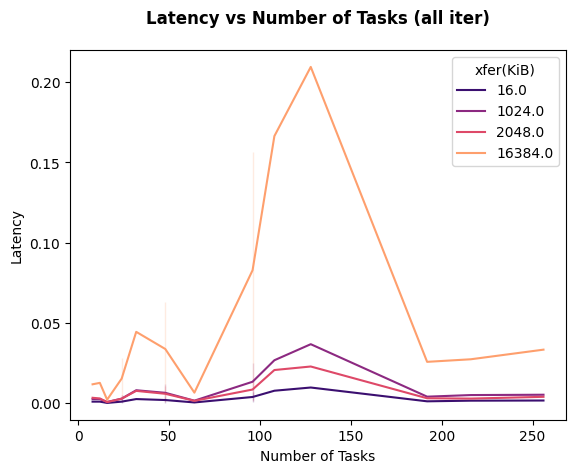

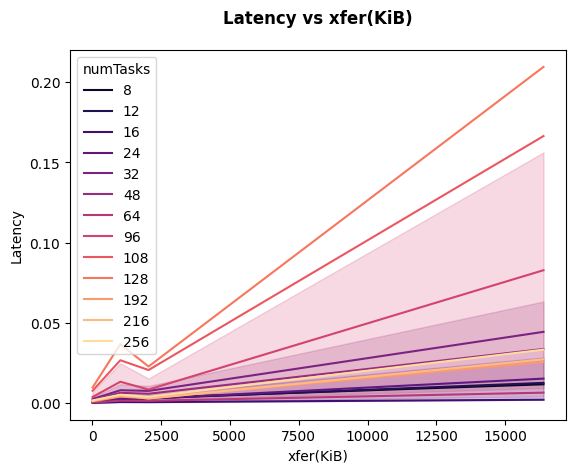

<Figure size 640x480 with 0 Axes>

In [37]:
palette = sns.color_palette("magma", len(df["xfer(KiB)"].unique()))
ax = sns.lineplot(
                data=df,
                x="numTasks",
                y="Latency",
                hue="xfer(KiB)",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                palette=palette
            )
# ax.set_xticks(subdf["job options.numjobs"].unique())
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("Latency")
ax.set_title("Latency vs Number of Tasks (all iter)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 
palette = sns.color_palette("magma", len(df["numTasks"].unique()))
ax = sns.lineplot(
                data=df,
                x="xfer(KiB)",
                y="Latency",
                hue="numTasks",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                palette=palette
            )
# ax.set_xticks(subdf["job options.numjobs"].unique())
ax.set_xlabel("xfer(KiB)")
ax.set_ylabel("Latency")
ax.set_title("Latency vs xfer(KiB)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 

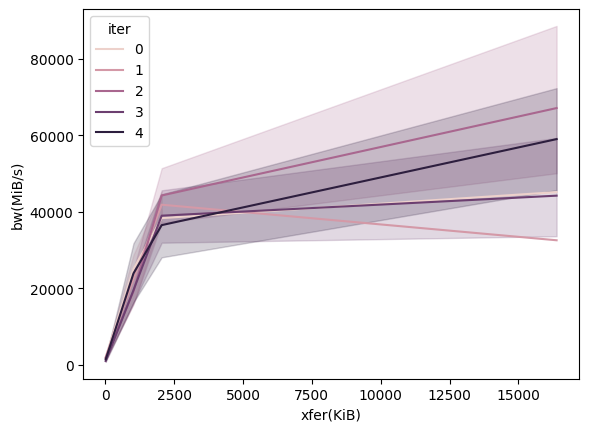

In [ ]:
palette = sns.color_palette("magma", len(df["iter"].unique()))
ax = sns.lineplot(
                data=df,
                x="xfer(KiB)",
                y="bw(MiB/s)",
                hue="iter",
                # style="rand_seq_type", dashes=dashes,
                # marker='o',
                # hue_order=hue_order,
                # order=bs_order,
                # palette=palette
            )
ax.set_xlabel("Number of Tasks")
ax.set_ylabel("Bandwidth (MiB/s)")
ax.set_title("Bandwidth vs Number of Tasks (all iter)", weight="bold", x=0.5, y=1.05)
plt.show()
plt.clf() 